In [24]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# sklearn :: models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

sns.set_style('whitegrid')

# Problem definition

In [25]:
# Apply regression models to predict the Product Family sales along with the market segment

# Load the data

In [26]:
#input
df_sales = pd.read_csv('/Users/jeromepotvin/Desktop/PERSONNEL JEROME/CONCORDIA/1260_BIG DATA/PROJECT/DATA/RAW/1_FINAL CUSTOMER SALES_16_17.csv')
print(df_sales.columns)
df_sales.head()

Index(['Customer_Name ', 'Product_Family_Desc', 'Ship_Type', 'Order Type',
       'Customer_Address ', 'Market_Segment_Desc ', 'Supplier_Name', '2016',
       '2017'],
      dtype='object')


,Customer_Name,Product_Family_Desc,Ship_Type,Order Type,Customer_Address,Market_Segment_Desc,Supplier_Name,2016,2017
0,Customer_Name,WIRE & CABLE,1,A,"SAINT-LAURENT, H4T1X7",OTHER,SPOOLON MFG LTD,"$2,011.52","$3,017.28"
1,Customer_Name,CONDUIT & ACCESSORIES,1,C,"SAINT-LAURENT, H4T1X7",OTHER,COLUMBIA/MBF,$41.19,NaN
2,Customer_Name,CONDUIT & ACCESSORIES,1,C,"SAINT-LAURENT, H4T1X7",OTHER,REXEL CANADA ELECTRICAL INC.,$29.87,$4.35
3,Customer_Name,CONDUIT & ACCESSORIES,1,C,"SAINT-LAURENT, H4T1X7",OTHER,THOMAS & BETTS,NaN,$22.27
4,Customer_Name,"CONNECT, FITT & OUT/BOXES",1,A,"SAINT-LAURENT, H4T1X7",OTHER,3M CDA INC,$13.00,NaN


# Feature Engineering 

In [27]:
# Cleaning according to the data dictionary
# https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
#print(len(df_sales))
# X2: Product Family Desc (1 = WIRE_CABLE; 2 = CONDUIT_ACCESSORIES; 3 = CONNECT_FITT_OUTBOXES; 4 = DATACOM; 5 = DISTRIBUTION_FUSES; 6 = HEATING_PRODUCTS; 7 = LIGHTING; 8 = MOTOR_CONTROLS_AUTOMATION; 9 = OTHER_PRODUCTS; 10 = SECURITY_PRODUCTS; 11 = TOOLS). 
#df_sales = df_sales[df_sales['Product_Family_Desc'].isin([1,2,3,4,5,6,7,8,9,10,11])]
# X3: Market Segment Desc (1 = COMMERCIAL CONTRACTOR; 2 = DATA CONTRACTORS; 3 = RESIDENTIAL CONTRACTOR; 4 = INDUSTRIAL CONTRACTOR). 
#df_sales = df_sales[df_sales['Market_Segment_Desc '].isin([1,2,3,4])]
#X4: Ship Type (1 = WH; 2 = NLI; 3 = Project). 
#df_sales = df_sales[df_sales['Ship_Type'].isin([1,2,3])]
#print(len(df_sales))

In [28]:
# Product Family Desc, Market Segment Desc , Ship Type  to numerical columns
df_Product_Family_Desc = pd.get_dummies(df_sales['Product_Family_Desc'])
#df_sales['Product_Family_Desc'].columns = ['WIRE & CABLE', 'CONDUIT & ACCESSORIES', 'CONNECT FITT OUTBOXES', 'DATACOM', 'DISTRIBUTION & FUSES', 'HEATING PRODUCTS', 'LIGHTING', 'MOTOR CONTROLS AUTOMATION', 'OTHER PRODUCTS', 'SECURITY PRODUCTS', 'TOOLS']
df_Market_Segment_Desc  = pd.get_dummies(df_sales['Market_Segment_Desc '])
df_Ship_Type = pd.get_dummies(df_sales['Ship_Type'])                                              
#df_sales['Ship_Type'].columns = ['1 = WH','2 = NLI','3 = Project']
print(df_sales.shape, df_Product_Family_Desc.shape, df_Market_Segment_Desc.shape , df_Ship_Type.shape)
df_sales_aggregated = pd.concat([df_sales, df_Product_Family_Desc, df_Market_Segment_Desc , df_Ship_Type], axis=1)
df_sales_aggregated.head()

(144468, 9) (144468, 13) (144468, 11) (144468, 3)


,Customer_Name,Product_Family_Desc,Ship_Type,Order Type,Customer_Address,Market_Segment_Desc,Supplier_Name,2016,2017,ALTERNATE ENERGY,...,GOVERNMENT INSTITUTIONS,INDUSTRIAL CONTRACTOR,INDUSTRY END USERS,OTHER,RESIDENTIAL CONTRACTOR,UTILITIES,UTILITY CONTRACTORS,1,2,3
0,Customer_Name,WIRE & CABLE,1,A,"SAINT-LAURENT, H4T1X7",OTHER,SPOOLON MFG LTD,"$2,011.52","$3,017.28",0,...,0,0,0,1,0,0,0,1,0,0
1,Customer_Name,CONDUIT & ACCESSORIES,1,C,"SAINT-LAURENT, H4T1X7",OTHER,COLUMBIA/MBF,$41.19,NaN,0,...,0,0,0,1,0,0,0,1,0,0
2,Customer_Name,CONDUIT & ACCESSORIES,1,C,"SAINT-LAURENT, H4T1X7",OTHER,REXEL CANADA ELECTRICAL INC.,$29.87,$4.35,0,...,0,0,0,1,0,0,0,1,0,0
3,Customer_Name,CONDUIT & ACCESSORIES,1,C,"SAINT-LAURENT, H4T1X7",OTHER,THOMAS & BETTS,NaN,$22.27,0,...,0,0,0,1,0,0,0,1,0,0
4,Customer_Name,"CONNECT, FITT & OUT/BOXES",1,A,"SAINT-LAURENT, H4T1X7",OTHER,3M CDA INC,$13.00,NaN,0,...,0,0,0,1,0,0,0,1,0,0


In [29]:
# Remove not necessary columns
del df_sales['Product_Family_Desc']
del df_sales['Market_Segment_Desc ']
del df_sales['Ship_Type']

In [30]:
# feature engineering
X_columns = df_sales.columns[:-1]
y_column = df_sales.columns[-1]

# Model Training

In [31]:
# split the data

threshold = 0.8
X = df_sales[X_columns]
y = df_sales[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (115574, 5)
y_train (115574,)
X_test (28894, 5)
y_test (28894,)


# Model Training / Evaluation - Using Split

In [32]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('Precision', precision)
    print('Recall', recall)
    results.append([m[0], precision, recall])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'precision', 'recall']
df_results = df_results.sort_values(by='precision', ascending=False)
df_results

MODEL Naive Bayes


ValueError: could not convert string to float: '$323.40 '

# Model Training / Evaluation - Cross Validation

In [33]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())
]

k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'precision':[], 'recall':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        results[m[0]]['precision'].append(precision)
        results[m[0]]['recall'].append(recall)

MODEL Naive Bayes


ValueError: could not convert string to float: '$1,628.00 '

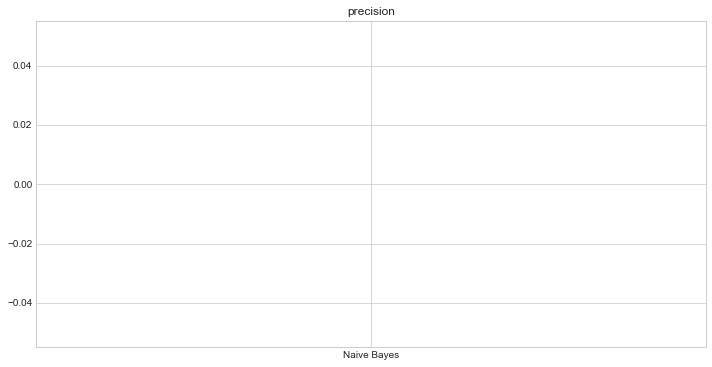

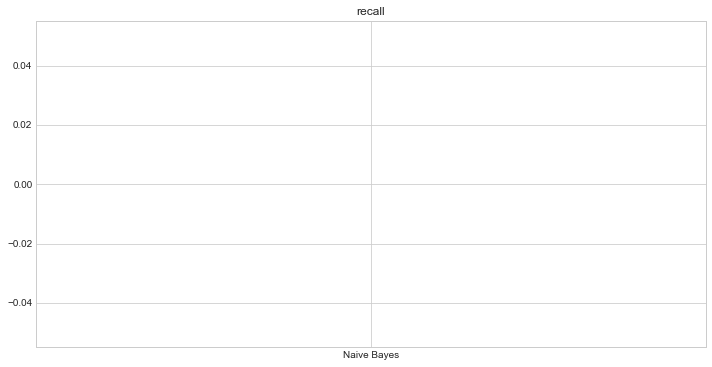

In [34]:
for metric in ['precision', 'recall']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

In [35]:
#"	What could look like 2017 sales within product family, market segment & ship type using machine learning process?

In [ ]:
#Due to multiple datasets and the complexiy of cleaning and mergin data, only sales 2017 was used

In [ ]:
#ValueError: could not convert string to float: '$1,628.00 ' tried to resolve ths error, but did not find how